In [ ]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from tqdm import trange

import time

In [ ]:
Lx = np.array([2, 3, 4, 5, 6, 7, 8])
Ly = 4
kT = np.arange(1.0, 5.0, 0.1)


In [ ]:
@nb.jit(nopython=True, parallel=True)
def matrix_process(lx, Ly, kt):
  """
  используя двоичные предствления числа перебираю все матрицы -1 и 1
  считаю среднюю энергию
  принимает размеры решетки и константу kt
  влзвращает среднюю энергию E_sum/(Z*lx*Ly)
  """
  Z = 0
  E_sum = 0
  for k in nb.prange(2**(Ly*lx)):
        s=np.zeros((lx, Ly))
        k1 = np.int64(k)
        for m in range(lx):
          for n in range(Ly):
            #s[m][n]=(-1)**(int(k1%2))
            s[m, n]=(-1)**(int(k1%2))
            k1=k1//2
        Esigma = 0
        for i in range(-1, lx-1):
          for j in range(-1,  Ly-1  ):
            Esigma -= (s[i,j]*s[i, j+1] + s[i, j]*s[i+1, j])
            #Esigma -= (s[i][j]*s[i][j+1] + s[i][j]*s[i+1][j])
        E_sum += Esigma * np.exp(((-1)*Esigma )/ kT[kt])
        Z += np.exp(((-1)*Esigma)/ kT[kt])
  return(E_sum/(Z*lx*Ly))



def find_matrix(Lx, Ly, kT):
  """
  для всех комбинаций lx и kt считаю среднее значение энергии, вызывая ф-ию выше
  принимсает массив Lx, Ly и массив констант kT
  возвращает массив средних
  """
  Esigma_av = np.zeros((len(Lx), 40))
  for lx in range (len(Lx)):
    start = time.time()
    for kt in trange (len(kT)):
      Esigma_av[lx][kt] = matrix_process(Lx[lx], Ly, kt)
    end = time.time() - start ##  время работы программы
    print("for Lx= ", Lx[lx], " time is ", end)
  return(Esigma_av)




In [ ]:
Esigma_av_ans = find_matrix(Lx, Ly, kT)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 20.78it/s]


for Lx=  2  time is  1.9463388919830322


100%|████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 7673.09it/s]


for Lx=  3  time is  0.00870513916015625


100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 934.00it/s]


for Lx=  4  time is  0.04477405548095703


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 57.21it/s]


for Lx=  5  time is  0.700103759765625


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:28<00:00,  1.39it/s]


for Lx=  6  time is  28.714167833328247


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [09:58<00:00, 14.96s/it]


for Lx=  7  time is  598.3592474460602


100%|███████████████████████████████████████████████████████████████████████████████| 40/40 [1:44:25<00:00, 156.64s/it]

for Lx=  8  time is  6265.5877985954285


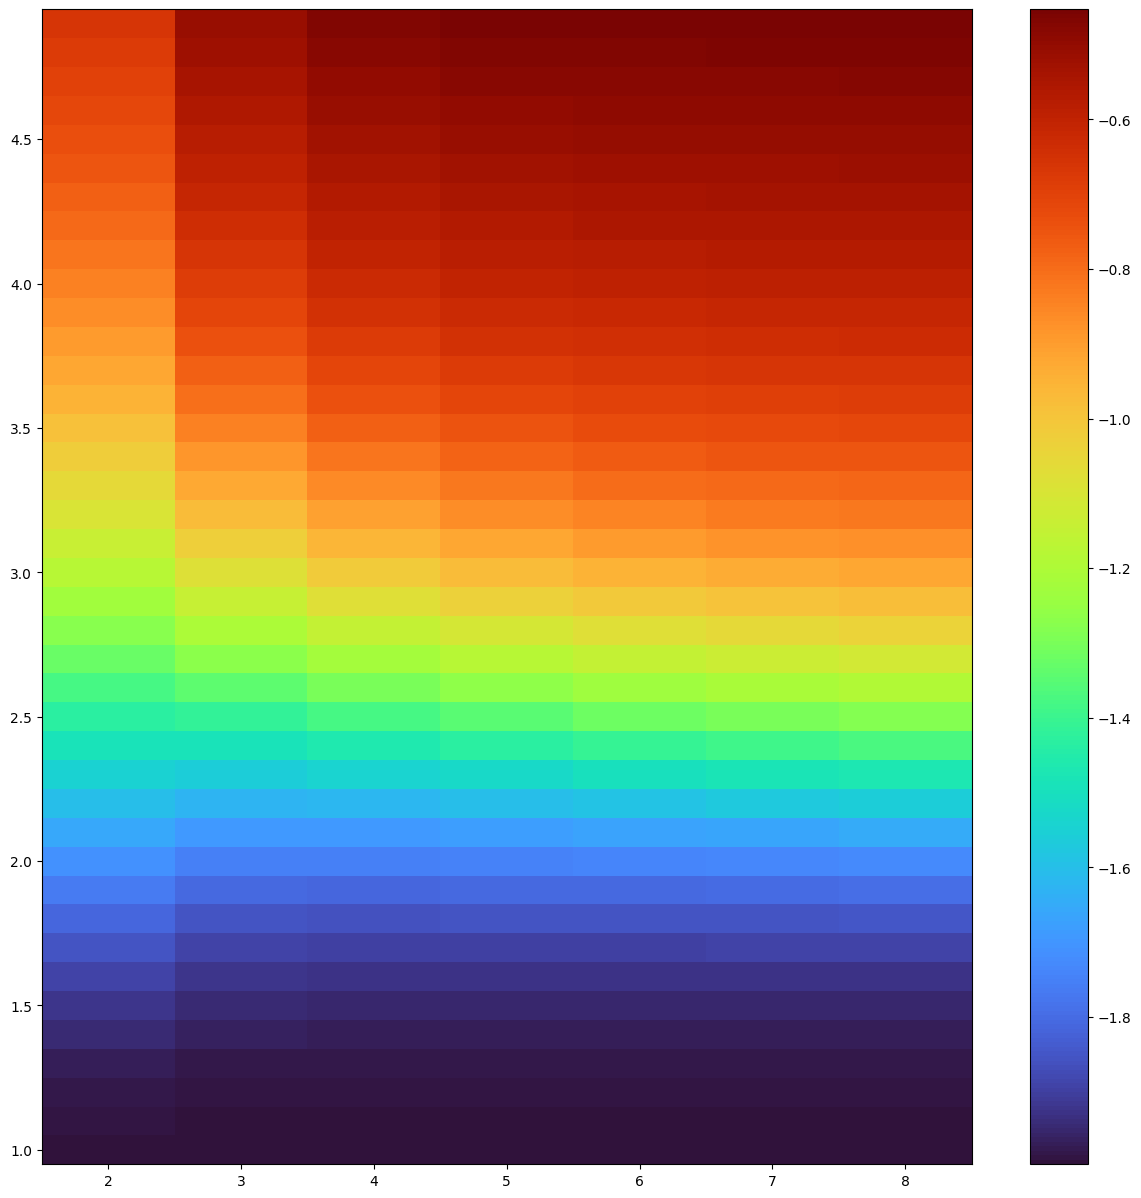

In [ ]:
"""
вывод карты
"""

plt.figure(figsize=(15, 15))
plt.pcolormesh(Lx, kT, np.transpose(Esigma_av_ans), cmap='turbo')
plt.colorbar()
plt.show()

In [ ]:
"вывод массива средних энергий"
print(Esigma_av_ans)

[[-1.99509474 -1.98967862 -1.98074878 -1.96731117 -1.94851445 -1.92375828
  -1.89277291 -1.85565639 -1.81286316 -1.76514762 -1.71347563 -1.65892227
  -1.60257405 -1.5454491  -1.48844224 -1.43229537 -1.3775895  -1.3247523
  -1.27407538 -1.22573609 -1.17982015 -1.13634286 -1.09526756 -1.05652101
  -1.02000562 -0.98560898 -0.9532109  -0.92268862 -0.89392045 -0.86678827
  -0.84117913 -0.8169862  -0.79410926 -0.77245486 -0.75193626 -0.73247322
  -0.71399168 -0.69642337 -0.67970548 -0.66378023]
 [-1.99711779 -1.99383665 -1.98825271 -1.97949351 -1.96659182 -1.94853206
  -1.92432618 -1.89312223 -1.85433583 -1.80777902 -1.75375117 -1.69305981
  -1.62695673 -1.55700043 -1.48487836 -1.41223059 -1.34050963 -1.27089443
  -1.20425882 -1.14118312 -1.08199278 -1.02680913 -0.97560137 -0.92823315
  -0.88450084 -0.84416295 -0.80696158 -0.77263715 -0.7409381  -0.71162671
  -0.68448222 -0.65930219 -0.63590256 -0.61411702 -0.5937959  -0.57480491
  -0.55702372 -0.54034463 -0.52467121 -0.50991714]
 [-1.997158